# Numerical Methods Lab 3: Data Fitting & Analysis

xkcd comic # 2048: Curve-fitting

![xkcd: Curve-fitting](curve_fitting.png)


When analysing data, we typically try to fit a function. Why is this the case?

### Linear Least Squares

There are many algorithms that exist for curve fitting. Perhaps the most well-known method is the *least squares method*. For simplicity, we will explore this method in the linear regime, meaning that the model is composed of a linear combination of the parameters. 

Let's take a look at a set of data that we'd like to fit a line to:

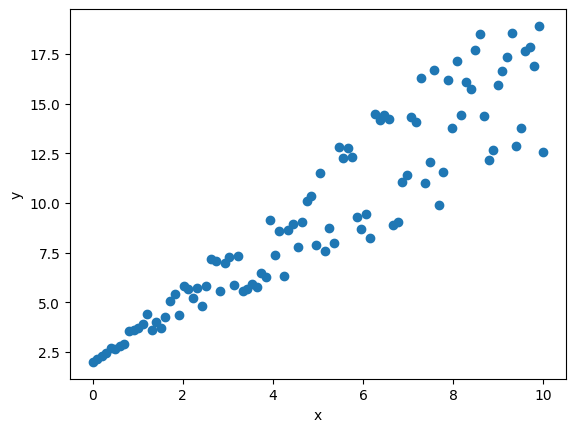

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

x = np.linspace(0, 10, 100)
y = 2 + x + (x * np.random.random(100)) # make the y- data a bit noisy

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

Let's now consider this data mathematically as a set of points $(x_i, y_i)$ for $i \in [1, n]$. 

Then, each point $y_i$ can be represented by an estimation function $\hat{y}(x_i)$, which is a linear combination of basis functions $f(x_i)$ such that 

$$ \hat{y}(x_i) = \alpha_1 f_1(x_i) + \alpha_2 f_2(x_i) + \dots + \alpha_m f_m(x_i)$$

where $\alpha_1, \alpha_2, \dots, \alpha_m$ are coefficients. For simplicity, we can refer to these coefficients as $\alpha_j$ where $j \in [1, m]$

The goal of least squares regression is to find the coefficients $\alpha_j$ that minimise the *total squared error*, $E$, defined as 

$$ E = \sum_{i=1}^n (\hat{y} - y_i)^2 $$

We can simplify this further by defining some column vectors. Let $\mathbf{X}$ represent the $x_i$ data points, i.e.

$$ \mathbf{X} = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix} $$

Let $\mathbf{Y}$ represent the $y_i$ data points: 

$$ \mathbf{Y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix} $$

Let $\hat{\mathbf{Y}}$ represent the estimation functions $\hat{y}(x_i)$: 

$$ \hat{\mathbf{Y}} = \begin{pmatrix} \hat{y}(x_1) \\ \hat{y}(x_2) \\ \vdots \\ \hat{y}(x_n) \end{pmatrix}$$

Let $\beta$ represent the coefficients $\alpha_j$: 

$$ \beta = \begin{pmatrix} \alpha_1 \\ \alpha_2 \\ \vdots \\ \alpha_m \end{pmatrix} $$

and let $\mathbf{F}(x_i)$ be a function that returns a column vector of $f_j(x_i)$, i.e. 

$$ \mathbf{F}(x_i) = \begin{pmatrix} f_1(x_i) \\ f_2(x_i) \\ \vdots \\ f_m(x_i) \end{pmatrix} $$

We can then define an $m \times n$ matrix $\mathbf{A}$ such that each column is $\mathbf{F}(x_i)$: 

$$ \mathbf{A} = \begin{pmatrix} 
        f_1(x_1) & f_1(x_2) & \dots & f_1(x_n) \\ 
        f_2(x_1) & f_2(x_2) & \dots & f_2(x_n) \\ 
        \vdots & \vdots & \cdots & \vdots \\ 
        f_m(x_1) & f_m(x_2) & \dots & f_m(x_n) 
        \end{pmatrix}
$$


With these simplifications, we can now rewrite the estimation of the data at each data point $x_i$

$$ \begin{split} 
\hat{y}(x_1) &= \alpha_1 f_1(x_1) + \alpha_2 f_2(x_1) + \dots + \alpha_m f_m(x_1) \\ 
\hat{y}(x_2) &= \alpha_1 f_1(x_2) + \alpha_2 f_2(x_2) + \dots + \alpha_m f_m(x_2) \\ 
& \qquad\qquad\qquad\qquad\quad \vdots \\
\hat{y}(x_i) &= \alpha_1 f_1(x_i) + \alpha_2 f_2(x_i) + \dots + \alpha_m f_m(x_i) \\
\end{split}$$

as 

$$ \hat{\mathbf{Y}} = \mathbf{A}\beta$$



Recall that the aim of the least squares method is to minimise the total squared error, 
$$E = \sum_{i=1}^n (\hat{y} - y_i)^2$$

Written in vector form, we are trying to minimise 

$$ E = \lVert \hat{\mathbf{Y}} - \mathbf{Y} \rVert^2 $$

To do so, we solve the equation 

$$ \hat{\mathbf{Y}}^\top (\mathbf{Y} - \hat{\mathbf{Y}}) = (\mathbf{A}\beta)^\top (\mathbf{Y} - \mathbf{A}\beta) = 0$$

where ($^\top$) denotes the *transpose* of a vector or matrix. Solving for $\beta$ results in the *least squares regression formula*:

$$ \beta = (\mathbf{A}^\top \mathbf{A})^{-1} \mathbf{A}^\top \mathbf{Y} $$

Knowing how the least squares regression is now calculated, let's go back to our data from earlier. 

We would like to find some function $\hat{\mathbf{y}} = \alpha_1 x + \alpha_2$ that fits the data.

We can create the matrix $\mathbf{A}$ using the *vstack* function provided by numpy. Essentially this function stacks arrays vertically (row-wise), so we will need to transpose the result afterwards to obtain the matrix in the correct format. Let us assume that initially $\alpha_1 = \alpha_2 = 1$.

In [5]:
A = np.vstack([x, np.ones(len(x))]).T
#print(A)

We then turn our $y$ values into a column vector $\mathbf{Y}$: 

In [4]:
Y = y[:, np.newaxis]

Finally, we can calculate $\beta$ using some useful linear algebra functions provided by numpy:

In [6]:
beta = np.dot((np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)), Y)

Here, 

* **np.dot** provides the dot product of two vectors or matrices 
* **np.linalg.inv** provides the inverse matrix 

We can now extract our alpha values from $\beta$:

In [7]:
alpha1 = beta[0]
alpha2 = beta[1]

print(f"alpha 1: {alpha1},  alpha2: {alpha2}")

alpha 1: [1.52398573],  alpha2: [1.90566547]


Finally, we can plot our fit obtained by the least squares method:

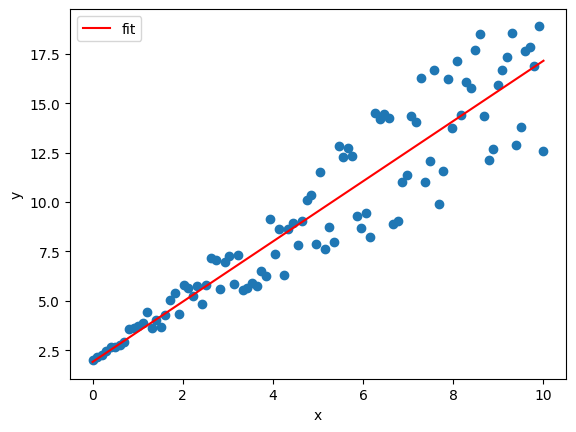

In [8]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, alpha1 * x + alpha2, color='r', label='fit')
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

Luckily for us, we do not need to manually fit functions to the data in python. Instead, we can use *optimize.curve_fit* from scipy to do this for us!


### Curve fitting with scipy

The *curve_fit* function from scipy.optimize is an incredibly powerful tool in data analysis since it enables us to fit not only simple linear and polynomial functions, but any arbitrarily complex function if needed. In addition, you can calculate the standard error for any parameter in the fit. 

Let's go back to our data from earlier, but now we will create the line of best fit by using curve_fit. First, we can import it as


In [9]:
from scipy.optimize import curve_fit

We can define our fit function as

In [10]:
def fit(x, a, b):
    return a*x + b

Now, we can use curve_fit to calculate the fit parameters and the covariance matrix by passing in our fit function as well as the x and y data

In [11]:
parameters, covariance = curve_fit(fit, x, y, p0=[1, 1])

Our parameters $a$ and $b$ are stored within the *parameters* list. We can simply extract them into variables:

In [12]:
print(parameters)

a = parameters[0]
b = parameters[1]

print(f"a: {a}, b: {b}")

[1.52398573 1.90566546]
a: 1.5239857301653634, b: 1.9056654580571153


And finally, we can plot our fit!

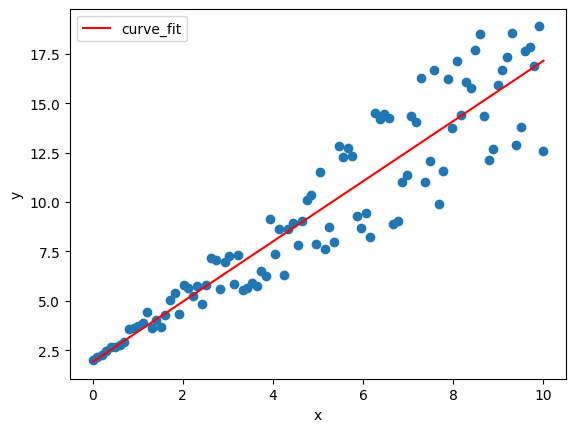

In [13]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, fit(x, a, b), color='r', label="curve_fit")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

A small aside on syntax: we don't necessarily have to manually extract the parameters $a$ and $b$ from the parameters list. We can actually pass this straight into our fit function like this:

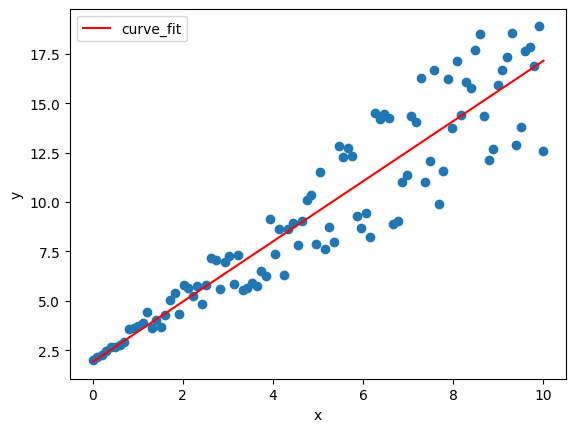

In [14]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, fit(x, *parameters), color='r', label='curve_fit')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

Let's have a look at the covariance matrix output by curve_fit

In [15]:
covariance

array([[ 0.00357214, -0.0178607 ],
       [-0.0178607 ,  0.1196727 ]])

The covariance matrix is a square matrix used to represent the covariance between elements in a vector. The diagonal components represent the variance of a given variable, while the non-diagonal components are the covariance (recall that the variance is a measure of spread from the mean of the data, while covariance is a measure of how two variables vary together). Consider a vector composed of $n$ elements, then the covariance matrix has the form 

$$ \begin{pmatrix} \text{Var}(x_1) & \cdots & \text{Cov}(x_n,x_1) \\ \vdots & \ddots & \vdots \\ \text{Cov}(x_n, x_1) & \cdots & \text{Var}(x_n) \end{pmatrix} $$

If the covariance is **positive**, then there is a positive relationship between the two variables - i.e., as one variable increases in value, so does the other. If the covariance is **negative**, there is a negative relationship between the two variables. If the covariance is **zero**, this implies that there is no relationship between the two variables.

There are a number of uses for the covariance matrix when fitting data. For instance, the *condition number* of the covariance matrix can tell us if the model is overparameterised, meaning it is more complicated than it needs to be. Extremely high condition numbers imply overparameterisation.  

The condition number for our fit $y = ax + b$ can be calculated using numpy's *linalg.cond* function:

In [16]:
np.linalg.cond(covariance)

138.00810152517258

Let's now consider a cubic fit to our data of the form $y = ax^3 + bx^2 + cx + d$, and see how this impacts the condition number. We have added 2 more parameters to the fit in this case.

In [17]:
def fit2(x, a, b, c, d):
    return a*x**3 + b*x*2 + c*x + d

parameters2, covariance2 = curve_fit(fit2, x, y)

In [18]:
np.linalg.cond(covariance2)

9.09532792120724e+17

Notice how our condition number has increased to such a large value - this heavily implies that the addition of the 2 extra parameters has resulted in our fit being overparameterised, despite the fit also working with the data: 

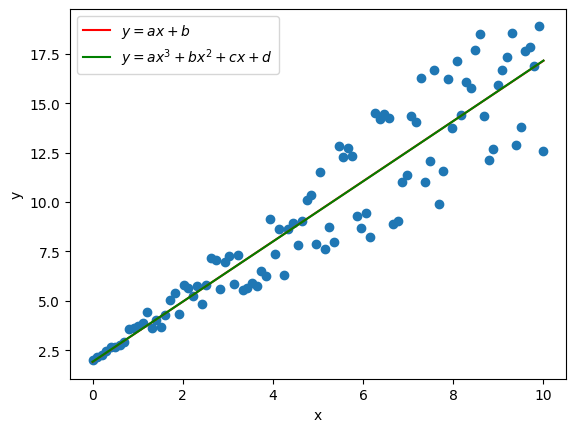

In [19]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, fit(x, *parameters), color='r', label=r"$y=ax+b$")
ax.plot(x, fit2(x, *parameters2), color='g', label=r"$y=ax^3 + bx^2 + cx + d$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

### Pearson Correlation Coefficient 

Let's continue considering our plot of the x,y data from earlier. How could we measure the strength of the relationship between the two variables? 

To do so, we can use the *Pearson correlation coefficient*, which essentially measures the linear correlation between two variables. It is defined as the ratio between the covariance of the two variables, and the product of their standard deviations:

$$ \rho_{x,y} = \frac{\text{cov}(x, y)}{\sigma_x \sigma_y} $$

or in terms of the variance of the variables: 

$$ \rho_{x,y} = \frac{\text{cov}(x, y)}{\sqrt{\text{var}(x) \text{var}(y)}} $$

You can calculate the covariance via 

$$ \text{cov}(x, y) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu_x) (y_i - \mu_y) $$

In python, we can implement it like this:

In [20]:
def pearson_correl(x,y) :
    return np.mean((x - np.mean(x)) * (y - np.mean(y))) / np.sqrt(np.var(x) * np.var(y))

The Pearson correlation coefficient has a value that ranges from $-1$ to $+1$. If the value is very close to $-1$ or $+1$, i.e. $\lvert \rho_{x, y}\rvert \sim 1$, then it is implied that a linear relationship between the two variables fits the data perfectly. The sign of the coefficient tells us whether there is a positive or negative relationship between the variables. If the coefficient is 0, then it is implied that there is no linear dependency between the variables.

Let's have a look back at our data from earlier:

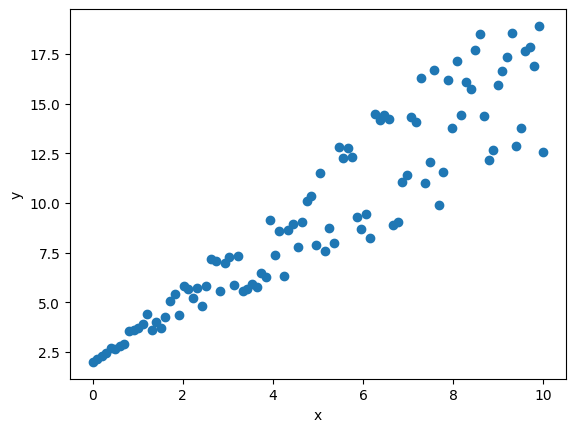

In [21]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

Let's now calculate the Pearson coefficient of correlation between our $x$ and $y$ data:

In [22]:
pearson_correl(x, y)

0.9322099573897815

In this case, the coefficient is positive, implying that there is a positive relationship between $x$ and $y$, as we can clearly see in the plot. Furthermore, the value is very close to 1 which suggests that a linear relationship does indeed strongly fit the data (as expected!).

### Root Finding 

Finding the roots of a function, i.e. finding a value of $x$ such that $f(x) = 0$, is important for solving and understanding the behaviour of functions, and it allows us to make predictions. For quadratic equations like $y = ax^2 + bx + c$, this is simple as we can just use the quadratic formula 

$$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

Let's suppose we have some function $y = x^3 - 3x + 1$.

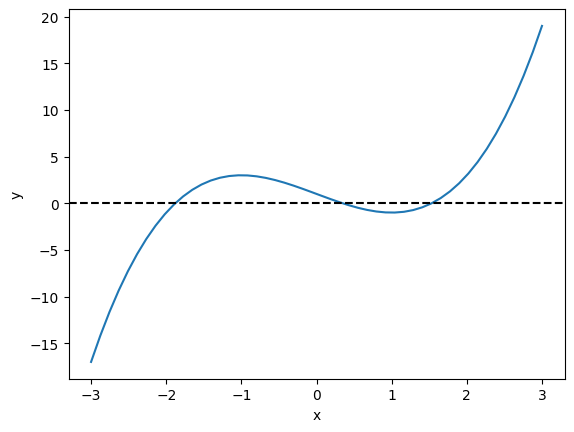

In [23]:
def func(x):
    return x**3 - 3*x + 1

x = np.linspace(-3, 3)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.axhline(0, color='k', linestyle='--')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

How could we determine the roots of this function?

#### Bisection Method

The bisection method is the simplest algorithm for root finding. It applies to any continuous function $f(x)$ on an interval $[a, b]$ where the value of $f(x)$ changes sign. 

The algorithm is as follows:

1. Select a starting interval $[a_0, b_0]$ such that $f(a_0)f(b_0) < 0$.
2. Compute $f(m_0)$ where $m_0 = (a_0 + b_0) / 2$ is the midpoint. 
3. Determine the next subinterval $[a_1, b_1]$:
    * If $f(a_0)f(m_0) < 0$, then let the next interval be $[a_1, b_1] = [a_0, m_0]$
    * If $f(b_0)f(m_0) < 0$, then let the next interval be $[a_1, b_1] = [m_0, b_0]$
4. Repeat steps 2. and 3. until some max number of interations $(N)$
5. Return the midpoint value $m_N = (a_N + b_N) / 2$

We can implement it in Python like this:

In [24]:
def bisection(f, a, b, n):
    if (f(a) * f(b) >= 0):
        print("Bisection method failed")
    
    a_n = a 
    b_n = b 

    for i in range(n):
        m_n = (a_n + b_n) / 2 

        if (f(a_n) * f(m_n) < 0):
            a_n = a_n 
            b_n = m_n 
        
        elif (f(b_n) * f(m_n) < 0):
            a_n = m_n 
            b_n = b_n 
        
        elif (f(m_n) == 0):
            print(f"Found exact solution after {i} iterations")
            return m_n 
        
        else:
            print("Bisection method fails")
            return None 
        
    return m_n


Let's find the root of our function on the interval $[-3, -1]$ with 50 iterations

In [25]:
root1 = bisection(func, -3, -1, 50)

print(root1)

-1.879385241571816


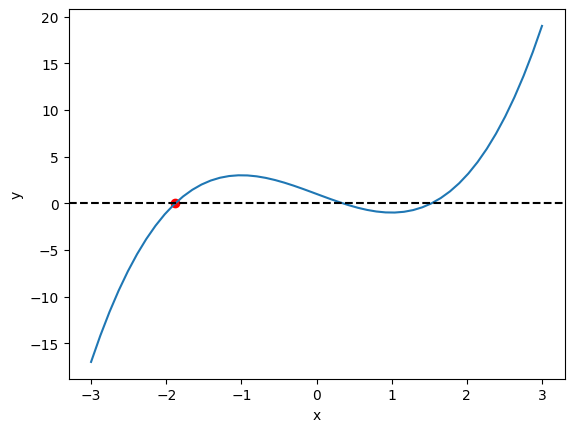

In [26]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.axhline(0, color='k', linestyle='--')
ax.scatter(root1, 0, color='r')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

And the next two roots on the intervals $[-1, 1]$ and $[1, 2]$:

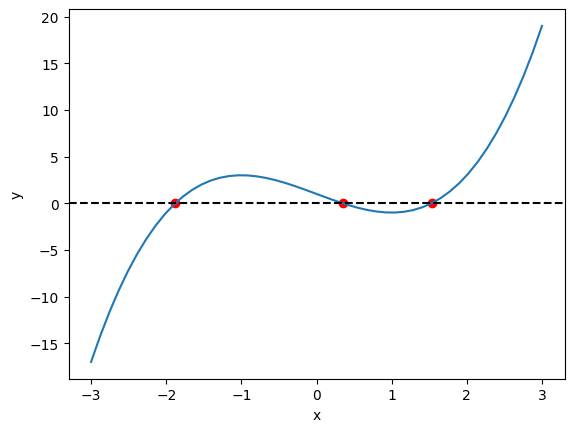

In [27]:
root2 = bisection(func, -1, 1, 50)
root3 = bisection(func, 1, 2, 50)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.axhline(0, color='k', linestyle='--')
ax.scatter(root1, 0, color='r')
ax.scatter(root2, 0, color='r')
ax.scatter(root3, 0, color='r')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

#### The Secant Method

A major disadvantage of the bisection method is that convergence to the roots may be slow. A faster alternative is the *Secant method*. Instead of dividing the interval by midpoints, the secant method divides the interval using a secant line that connects the end points. The algorithm is as follows: 

1. Choose a starting interval $[a_0, b_0]$ such that $f(a_0)f(b_0) < 0$.
2. Compute $f(x_0)$ where $x_0$ is given by the secant line 

$$ x_0 = a_0 - f(a_0) \frac{b_0 - a_0}{f(b_0) - f(a_0)}$$

3. Determine the next subinterval $[a_1, b_1]$: 
    * If $f(a_0)f(x_0) < 0$, then let the next interval be $[a_1, b_1] = [a_0, x_0]$
    * If $f(b_0)f(x_0) < 0$, then let the next interval be $[a_1, b_1] = [x_0, b_0]$
4. Repeat steps 2. and 3. until some max number of interations $(N)$
5. Return the value $x_N$: the $x$-intercept of the $N^\text{th}$ interval.

We can implement it in Python like this:

In [28]:
def secant(f, a, b, n):
    if (f(a) * f(b) >= 0):
        print("Secant method failed")
    
    a_n = a 
    b_n = b 

    for i in range(n):
        x_n = a_n - f(a_n) * ((b_n - a_n) / (f(b_n) - f(a_n)))

        if (f(a_n) * f(x_n) < 0):
            a_n = a_n 
            b_n = x_n 
        
        elif (f(b_n) * f(x_n) < 0):
            a_n = x_n 
            b_n = b_n 
        
        elif (f(x_n) == 0):
            print(f"Found exact solution after {i} iterations")
            return x_n 
        
        else:
            print("Secant method fails")
            return None 
        
    return x_n

With the same data as last time, let's find the root of our function on the interval $[-3, -1]$ with 50 iterations

In [31]:
root1_secant = secant(func, 0, 3, 50)

print(root1_secant)

Secant method failed
Secant method fails
None


We can compare with the output from the bisection method and see they are very similar:

In [30]:
print(f"Bisection method: {root1}")
print(f"Secant method: {root1_secant}")

Bisection method: -1.879385241571816
Secant method: -1.8793852415718153


### Perceptron Classification Algorithm

Machine learning is an important aspect of artificial intelligence that revolves around the development and study of statistical algorithms that can learn from data, and perform tasks without explicit instuctions.

The *Perceptron* is a simple binary linear classifier, meaning it can make a classification decision (such as a label or a category) for an object based on a linear combination of its features. It is one of the simplest and earliest machine learning techniques for classification.

There are four main components of a perceptron:

1. The features
    * This is also known as the input, which is essentially the data that goes into the perceptron 
        * Let's denote the features as $x_n$ with $n \in [0, N-1]$ for $N$ data points

2. The weights and bias
    * The *weights* are a numerical value assigned to each of the features to determine the strength of their influence on the output prediction 
        * Let's denote the weights as $w_n$ with $n \in [0, N-1]$
    * The *bias* is a numerical value used to modify the sensitivity of the output 
        * Let the bias be $f_0$

3. The net sum 
    * This is the total sum of the features multiplied by their weights 
    
    $$ \sum_{n=1}^{N-1} w_n \cdot x_n $$

4. The activation function 
    * The bias is added to the net sum, and the classification is made depending on the value of the activation function 
        * Let 
            $$f(x, w, f_0) = \sum_{n=1}^{N-1} (w_n \cdot x_n) - f_0$$
        
        * Then the activation function can be represented by Heaviside step function 
            $$H(f(x, w, f_0)) = \begin{cases} 1 & \qquad\text{if }f(x, w, f_0) \geq 0 \\ 0 & \qquad\text{if } f(x, w, f_0) < 0 \end{cases}$$

# Exercises

### Exercise 1

Consider the following $(x,y)$ data:

In [ ]:
x = np.linspace(0, 20, 100)
y = 5 - x**2 - (x**2 * np.random.random(100))

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

Fit a curve of the form $y = ax^2 + bx + c$ to the data without using curve_fit. **Hint**: use linear least squares

In [ ]:
# your code here

### Exercise 2
Generate some linear data such that the Pearson correlation coefficient is between $-0.5$ and $-0.6$. What would a plot of this $(x, y)$ data look like?

In [ ]:
# your code here

### Exercise 3
The file "1961_1990.txt" contains the mean monthly duration of sunlight between the years 1961 - 1990. 

Load and plot the data with pandas and obtain the data for the station with ID 1492.

You can relate the hours of sunlight to the month using a sinosoidal function of the form 

$$ H(T) = a \sin(bt + c) + d $$

Using curve_fit, fit the function $H(t)$ to the data. **Note**: you can specify a list of initial guess parameters by using p0=[] in the argument for curve_fit

In [ ]:
# your code here